# <center> Лабораторная работа 1
## <center> Задача предсказания оттока клиентов банка
### _Автор: Стецук Максим 1гр.2п.гр._

In [1]:
# Игнорирование предупреждений
import warnings
warnings.filterwarnings('ignore')

### <center> _Чтение и исследование данных_

In [2]:
#импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений
from sklearn import ensemble #ансамбли
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #сплитование выборки
import seaborn as sns

In [3]:
# Чтение данных
data = pd.read_csv('../data/churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


__*Значение столбцов таблицы*__

| Название столбца | Значение |
|------------------|----------|
| RowNumber | номер строки таблицы |
| CustomerId | идентификатор клиента |
| Surname | фамилия клиента |
| CreditScore | кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их) |
| Geography | страна проживания клиента (банк межнациональный) |
| Gender | пол клиента |
| Age | возраст клиента |
| Tenure | сколько лет клиент пользуется банком |
| Balance | сколько у клиента денег на счетах в банке |
| NumOfProduct | число услуг банка, которыми воспользовался клиент |
| HasCrCard | есть ли у клиента кредитная карта (1 — да, 0 — нет) |
| IsActiveMember | есть ли у клиента статус «активный клиент» (1 — да, 0 — нет) |
| EstimatedSalary | предполагаемая заработная плата клиента |
| Exited | статус ушедшего (1 — ушедший клиент, 0 — лояльный клиент) |

In [4]:
# Проверка на наличие пропусков
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

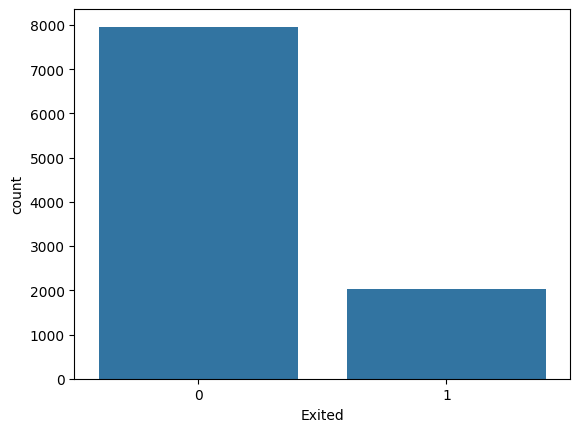

In [5]:
# Сбалансированность
sns.countplot(data=data, x='Exited');

In [6]:
# Категориальные признаки
types = data.dtypes
cat_features = list(types[(types == 'object')].index)
cat_features

['Surname', 'Geography', 'Gender']

### <center> _Подготовка данных (предобработка)_

In [7]:
adult_data = data.copy()

#Удаляем лишние признаки
adult_data = adult_data.drop(['Surname', 'RowNumber', 'CustomerId'], axis=1)

adult_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Уникальные значения категориалтных признаков
print("Уникальные значения Geography:", adult_data['Geography'].unique())
print("Уникальные значения Gender:", adult_data['Gender'].unique())

Уникальные значения Geography: ['France' 'Spain' 'Germany']
Уникальные значения Gender: ['Female' 'Male']


In [9]:
# Кодируем текстовые категориальные признаки
dummies_data = pd.get_dummies(adult_data, drop_first=True)
dummies_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [10]:
#Создаём матрицу наблюдений X и столбец с ответами y
X = dummies_data.drop(['Exited'], axis=1)
y = dummies_data['Exited']

In [11]:
# Разбиение на тренировочную и тестовую выборки с помощью train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 1, test_size = 0.2)

In [12]:
# Нормализацию данных с помощью min-max нормализации
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### <center> _Реализация модели_

In [13]:
#Создаем объект класса логистическая регрессия
log_reg_model = linear_model.LogisticRegression(solver='sag', random_state=1, max_iter=1000)
#Обучаем модель
log_reg_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=1, solver='sag')

In [14]:
#Делаем предсказание для тренировочной и тестовой выборок
y_train_pred = log_reg_model.predict(X_train_scaled)
y_test_pred = log_reg_model.predict(X_test_scaled)

In [15]:
from sklearn.metrics import classification_report

#Выводим отчеты о метриках классификации
print("Classification Report for train values:")
print(classification_report(y_train, y_train_pred))
print('---------------------------')
print("Classification Report for test values:")
print(classification_report(y_test, y_test_pred))

Classification Report for train values:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6370
           1       0.62      0.20      0.31      1630

    accuracy                           0.81      8000
   macro avg       0.72      0.59      0.60      8000
weighted avg       0.78      0.81      0.77      8000

---------------------------
Classification Report for test values:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.61      0.19      0.29       407

    accuracy                           0.81      2000
   macro avg       0.72      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



### <center> _Нахождение оптимального порога вероятности_

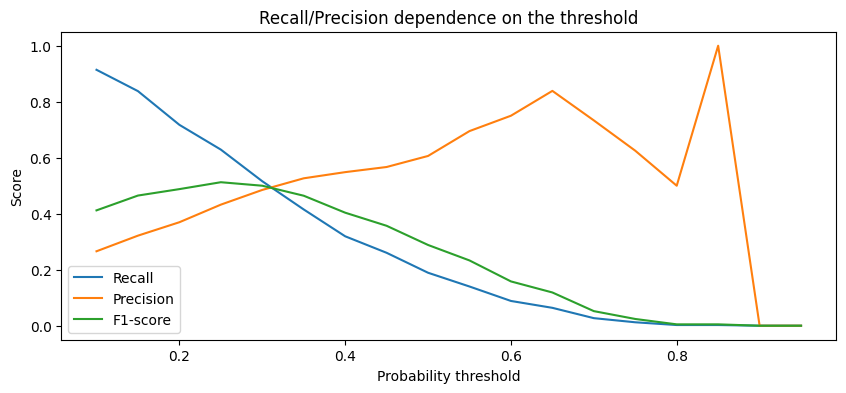

In [16]:
y_test_proba_pred = log_reg_model.predict_proba(X_test_scaled)[:, 1]
y_test_proba_pred = pd.Series(y_test_proba_pred)

recall_scores = []
precision_scores = []
f1_scores = []

thresholds = np.arange(0.1, 1, 0.05)

for threshold in thresholds:

    y_test_pred = y_test_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    recall_scores.append(metrics.recall_score(y_test, y_test_pred))
    precision_scores.append(metrics.precision_score(y_test, y_test_pred))
    f1_scores.append(metrics.f1_score(y_test, y_test_pred))

#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4))
#Строим линейный график зависимости recall от threshold
ax.plot(thresholds, recall_scores, label='Recall')
#Строим линейный график зависимости precision от threshold
ax.plot(thresholds, precision_scores, label='Precision')
#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-score')

#Даем графику название и подписи осям
ax.set_title('Recall/Precision dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
ax.legend()

In [17]:
#Задаем оптимальный порог вероятностей (исходя из построенного графика)
threshold_opt = 0.3

#Людей, которые уйдут с вероятностью больше 0,3 относим к классу 1, остальных - к классу 0
y_test_pred_opt = y_test_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)

# Выводим итоговый отчет о метриках классификации
print(metrics.classification_report(y_test, y_test_pred_opt))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1593
           1       0.48      0.52      0.50       407

    accuracy                           0.79      2000
   macro avg       0.68      0.69      0.68      2000
weighted avg       0.80      0.79      0.79      2000

